## 第七次练习

+ 请务必交到exer7文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请在12月20日前提交。

请写一下姓名和学号：
+ 姓名  文华虎
+ 学号  0165180

In [4]:
%matplotlib inline

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [6]:
请参考下面命令将CEPS.csv数据读入python

NameError: name '请参考下面命令将CEPS' is not defined

In [24]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df.head()


D:\python\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2


下面的图都至少需要在图上标注：
+ 图标题
+ x轴标题
+ y轴标题
+ 适当修改x轴或者y轴的刻度及标签，使之清晰美观
+ 根据需要添加图例

### 散点图
反映期中考试标准化成绩语文（stdchn）和期中考试标准化成绩数学（stdmat）的相关关系

D:\python\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


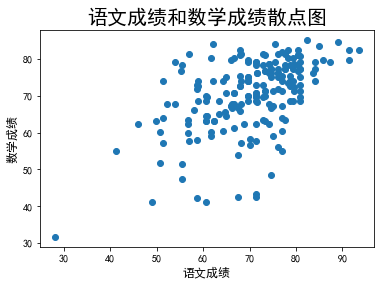

In [32]:
sentinels = {'stdchn': [' '], 'stdmat': [' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
df = df.head(200)

x1=df['stdchn']
x=[]
for x2 in x1:
    x.append(float(x2))
y=[]
y1=df['stdmat']
for y2 in y1:
    y.append(float(y2))

fig=plt.figure()
ax1=fig.add_subplot()
plt.title('语文成绩和数学成绩散点图', fontsize=20)
plt.xlabel('语文成绩', fontsize=12)
plt.ylabel('数学成绩', fontsize=12)
plt.scatter(x, y)
plt.show()

### 饼图
对问题“你是独生子女吗”(b01)的回答有“是”和“否”两种回答，相应的数字分别是1和2。请画一个饼图反映二者的比例。

D:\python\lib\site-packages\pandas\computation\expressions.py:182: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


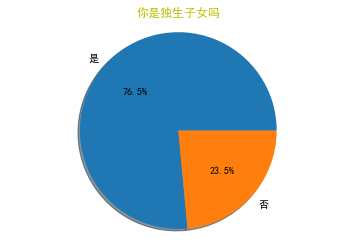

In [34]:
labels = ('是', '否')
x=sum(df.b01==1)/sum((df.b01==1)+(df.b01==2))
y=sum(df.b01==2)/sum((df.b01==1)+(df.b01==2))
sizes=[x,y]
fig1,ax1 = plt.subplots()
ax1.set_title("你是独生子女吗",fontdict = None, loc='center',color='y')
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

### 直方图
反映变量“每天晚上睡多长时间-小时”(b18a)的分布情况。

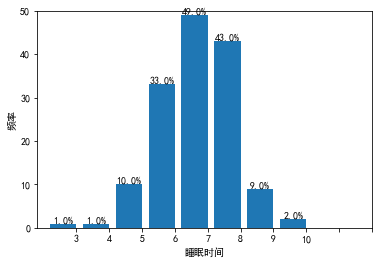

In [46]:
x1=df['b18a']
x1=x1[:150]
name_list = ['3', '4', '5', '6','7','8','9','10']
num_list = [1,1,10,33,49,43,9,2]
rects=plt.bar(range(len(num_list)), num_list)
index=[0,1,2,3,4,5,6,7,8,9]
index=[float(c)+0.4 for c in index]
plt.ylim(ymax=50, ymin=0)
plt.xticks(index, name_list)
plt.ylabel("频率") 
plt.xlabel("睡眠时间")
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height)+'%', ha='center', va='bottom')
plt.show()

### 柱图
反映变量"你妈妈是做什么工作的"(b08a)的职业分布情况，数字和编码关系如下：

+ 1	国家机关事业单位领导与工作人员
+ 2	企业/公司中高级管理人员
+ 3	教师、工程师、医生、律师
+ 4	技术工人（包括司机）
+ 5	生产与制造业一般职工
+ 6	商业与服务业一般职工
+ 7	个体户
+ 8	农民
+ 9 无业、失业、下岗


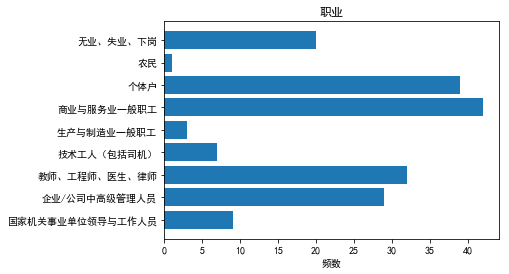

In [48]:
x1=sum(df.b08a=='1')
x2=sum(df.b08a=='2')
x3=sum(df.b08a=='3')
x4=sum(df.b08a=='4')
x5=sum(df.b08a=='5')
x6=sum(df.b08a=='6')
x7=sum(df.b08a=='7')
x8=sum(df.b08a=='8')
x9=sum(df.b08a=='9')
name_list=['国家机关事业单位领导与工作人员','企业/公司中高级管理人员',
'教师、工程师、医生、律师','技术工人（包括司机）','生产与制造业一般职工',
'商业与服务业一般职工','个体户','农民','无业、失业、下岗']
num_list=[x1,x2,x3,x4,x5,x6,x7,x8,x9]
plt.barh(range(len(num_list)),num_list,tick_label=name_list)

plt.xlabel('频数')
plt.title("职业")
plt.show()